# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing All Packages**

In [ ]:
import pandas as pd
import io
import numpy
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# **Loading Dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML/sobar-72.csv')
df

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,10,14,14,10,15,6,7,5,15,14,10,15,13,9,8,12,12,11,9,0
68,10,12,15,10,15,8,8,5,15,14,8,12,14,11,7,13,15,11,14,0
69,10,8,11,6,10,6,4,3,13,9,8,14,12,9,7,11,12,10,10,0
70,9,12,13,10,13,6,6,5,14,13,10,13,12,11,8,12,11,13,15,0


# **Fitting the Training set**

In [ ]:
# cancer = {"1":'YES' , "0":'NO'}
df1 = df.drop(['ca_cervix'],axis=1)
dtree = DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(df1,df['ca_cervix'],test_size=0.2,random_state=5)
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

# **Plotting DT using GINI Index**

[Text(0.5909090909090909, 0.9, 'perception_severity <= 5.0\ngini = 0.456\nsamples = 57\nvalue = [37, 20]'),
 Text(0.36363636363636365, 0.7, 'socialSupport_emotionality <= 9.5\ngini = 0.464\nsamples = 30\nvalue = [11, 19]'),
 Text(0.18181818181818182, 0.5, 'socialSupport_instrumental <= 3.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.09090909090909091, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.3, 'attitude_consistency <= 5.0\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.18181818181818182, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.36363636363636365, 0.1, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.5454545454545454, 0.5, 'motivation_strength <= 10.5\ngini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.45454545454545453, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6363636363636364, 0.3, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.8181818181818182, 0.7, 'motivation_strength <= 8.0\ngini 

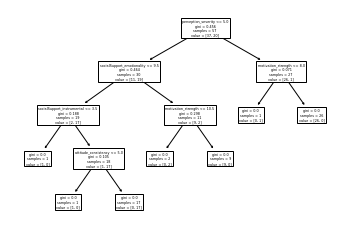

In [ ]:
tree.plot_tree(dtree,feature_names = ["behavior_sexualRisk","behavior_eating",	"behavior_personalHygine",	"intention_aggregation",	"intention_commitment",	"attitude_consistency",	"attitude_spontaneity",	"norm_significantPerson",	"norm_fulfillment",	"perception_vulnerability",	"perception_severity",	"motivation_strength",	"motivation_willingness",	"socialSupport_emotionality",	"socialSupport_appreciation",	"socialSupport_instrumental",	"empowerment_knowledge",	"empowerment_abilities",	"empowerment_desires"])



# **Accuracy Score**

In [ ]:
y_pred=dtree.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.8666666666666667


# **Evaluation Metrics**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.33      0.50         3

    accuracy                           0.87        15
   macro avg       0.93      0.67      0.71        15
weighted avg       0.89      0.87      0.84        15



In [ ]:
print("Mean Square Error : ",mean_squared_error(y_test, y_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test, y_pred))
print("R2 Score : ",r2_score(y_test, y_pred))

Mean Square Error :  0.13333333333333333
Mean Absolute Error :  0.13333333333333333
R2 Score :  -1.1428571428571423
